# Boxplot

### Boxplot shows:
- Minimum (excluding outliers): The smallest data point still within 1.5 IQR of the lower quartile.
- First Quartile (Q1): 25% of the data fall below this value.
- Median (Q2): The middle value (50% of the data fall below this).
- Third Quartile (Q3): 75% of the data fall below this value.
- Maximum (excluding outliers): The largest data point still within 1.5 IQR of the upper quartile.

### Box Components:
- Box: Spans from Q1 to Q3 (the interquartile range, or IQR). It shows the middle 50% of the data.
- Line inside the box: The median.
- Whiskers: Extend from the box to the minimum and maximum values within 1.5 * IQR from Q1 and Q3.
- Dots (Outliers): Individual points that fall outside the whiskers (i.e., more than 1.5 * IQR from the quartiles).


### What You Can Learn from a Boxplot:
- 1) Central tendency (via the median).
- 2) Spread of the data (via the IQR and whiskers).
- 3) Skewness:

     If the median is closer to Q1 → right-skewed.

     If the median is closer to Q3 → left-skewed.

- 4) Presence of outliers.
- 5) Comparison between groups (boxplots are great for side-by-side comparison across categories).

In [2]:
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

In [3]:
# # Lets generate some data
# np.random.seed(42) # Set seed for reproducibility

# size = 100
# mean = 40
# std=5 # 68% of the value would be +/-5 around the mean
# # Generate normally distributed values with mean=40 and std=20
# random_normal = np.random.normal(loc=mean, scale=std, size=size) # age of people from  a sample of size

# # Clip values to be within 20 and 150, then convert to integers
# ages_male = np.clip(random_normal, 20, 150).astype(int) # LOOK AT  numpy tutorial on clip function
# ages_male = np.sort(ages_male)

# print(f"ages_male: \n{ages_male}")

In [6]:
# 1) Read csv file and show one column Age
df = pd.read_csv("data_age_income_with_outliers.csv")

print(df)

     Age  Income
0     20   20000
1     20   20000
2     20   20000
3     20   20000
4     20   20000
..   ...     ...
100   10    5000
101   15    3000
102  160  250000
103  165  400000
104  170    1000

[105 rows x 2 columns]


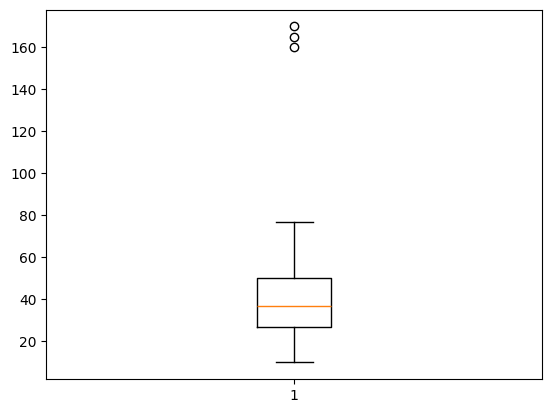

In [7]:
# 2) 
df = pd.read_csv("data_age_income_with_outliers.csv")
ages = df['Age']

plt.boxplot(ages)
plt.show()

## lets determine Q1, Q2, Q3, mean,etc of above

In [9]:
import numpy as np

data = ages

min_val = np.min(data)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50) # Q2 is median
Q3 = np.percentile(data, 75)
max_val = np.max(data)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

# Identify outliers (any data points outside 1.5 * IQR above Q3 or below Q1)
mask = (data < lower_bound) | (data > upper_bound)
outliers = data[mask]

# Print out the values
print(f"Stats:")
print(f"  Minimum: {min_val:.2f}")
print(f"  Q1: {Q1:.2f}")
print(f"  Q2: Median: {Q2:.2f}")
print(f"  Q3: {Q3:.2f}")
print(f"  Maximum: {max_val:.2f}")
print(f"  Outliers: \n{outliers}")
print()

Stats:
  Minimum: 10.00
  Q1: 27.00
  Q2: Median: 37.00
  Q3: 50.00
  Maximum: 170.00
  Outliers: 
102    160
103    165
104    170
Name: Age, dtype: int64



# STOP

# EXTRA

# Advanced applications

In [10]:
# Create a function to calculate all boxplot statistics
def calculate_box_stats(data):
    # Calculate the box plot statistics
    min_val = np.min(data)
    Q1 = np.percentile(data, 25)
    median = np.median(data)
    Q3 = np.percentile(data, 75)
    max_val = np.max(data)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Identify outliers (any data points outside 1.5 * IQR above Q3 or below Q1)
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    return min_val, Q1, median, Q3, max_val, outliers

# Print out the values
def print_box_stats(stats):
    min_val, Q1, median, Q3, max_val, outliers = stats
    print(f"Salary Stats:")
    print(f"  Minimum: {min_val:.2f}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  Maximum: {max_val:.2f}")
    print(f"  Outliers: {outliers}")
    print()

## Simulating temperature data for three cities

In [9]:
# # SKIP First generate the DS and save it in CSV file
# size=30
# city1_temps = np.random.normal(loc=15, scale=5, size=size)
# city2_temps = np.random.normal(loc=22, scale=6, size=size)
# city3_temps = np.random.normal(loc=10, scale=4, size=size)
# # Step 2: Create DataFrame
# df = pd.DataFrame({
#     'City_1_Temp': city1_temps,
#     'City_2_Temp': city2_temps,
#     'City_3_Temp': city3_temps
# })

# # Step 3: Save to CSV
# df.to_csv("data_city_temperature.csv", index=False)

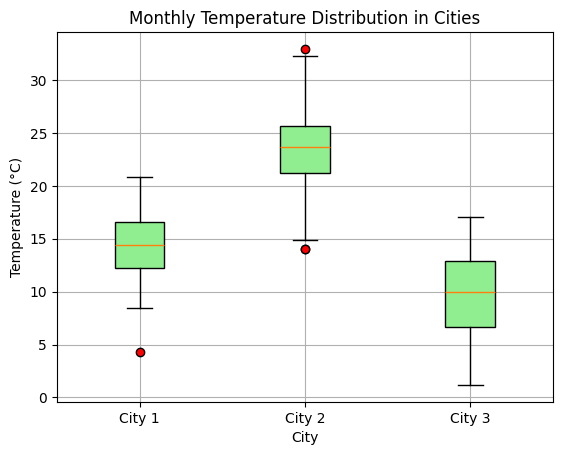

City1 stats:
Salary Stats:
  Minimum: 4.26
  Q1: 12.21
  Median: 14.42
  Q3: 16.60
  Maximum: 20.86
  Outliers: 24    4.255245
Name: City_1_Temp, dtype: float64

City2 stats:
Salary Stats:
  Minimum: 14.01
  Q1: 21.25
  Median: 23.66
  Q3: 25.65
  Maximum: 32.94
  Outliers: 0     32.935546
12    14.040402
15    14.007931
Name: City_2_Temp, dtype: float64

City3 stats:
Salary Stats:
  Minimum: 1.18
  Q1: 6.65
  Median: 9.99
  Q3: 12.87
  Maximum: 17.03
  Outliers: Series([], Name: City_3_Temp, dtype: float64)



In [11]:
# read the CSV file
df = pd.read_csv("data_city_temperature.csv")
city1_temps = df['City_1_Temp']
city2_temps = df['City_2_Temp']
city3_temps = df['City_3_Temp']

# Create a box plot
plt.boxplot([city1_temps, city2_temps, city3_temps],
            tick_labels=["City 1", "City 2", "City 3"],
            patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            flierprops=dict(markerfacecolor='red', marker='o')
)
plt.title("Monthly Temperature Distribution in Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

####################################################
print("City1 stats:")
stats = calculate_box_stats(city1_temps)
print_box_stats(stats)


print("City2 stats:")
stats = calculate_box_stats(city2_temps)
print_box_stats(stats)

print("City3 stats:")
stats = calculate_box_stats(city3_temps)
print_box_stats(stats)

# Simulating salary data for different job roles

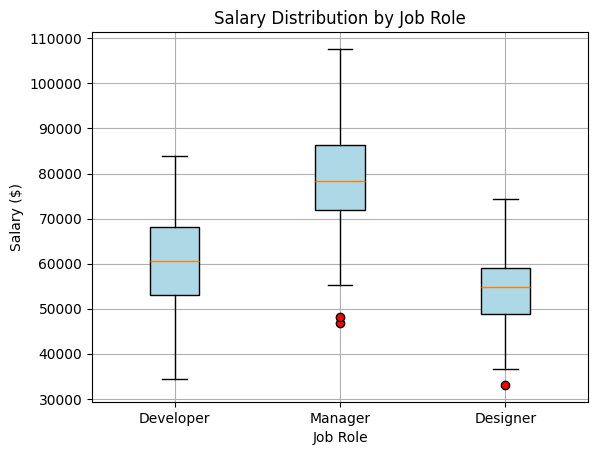

In [80]:
np.random.seed(0)
developer_salaries = np.random.normal(loc=60000, scale=10000, size=200)
manager_salaries = np.random.normal(loc=80000, scale=12000, size=150)
designer_salaries = np.random.normal(loc=55000, scale=8000, size=120)

# Create a box plot
plt.boxplot([developer_salaries, manager_salaries, designer_salaries], tick_labels=["Developer", "Manager", "Designer"], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title("Salary Distribution by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Salary ($)")
plt.grid(True)
plt.show()